In [35]:
import pandas as pd
import os
from io import StringIO

In [40]:
# dataset_path="./dataset/mooncake/conversation_trace.jsonl"
dataset_path="./dataset/microsoft/AzureLLMInferenceTrace_conv_1week.csv"

In [41]:
def read_jsonl_to_pd(dataset_path):
    data = []
    with open(dataset_path, 'r') as f:
        for line in f:
            data.append(pd.read_json(StringIO(line), typ='series'))
    return pd.DataFrame(data)
if "jsonl" in dataset_path:
    df = read_jsonl_to_pd(dataset_path)
    figname = os.path.basename(dataset_path).split(".")[0]
elif "csv" in dataset_path:
    df = pd.read_csv(dataset_path)
    figname = os.path.basename(dataset_path).split(".")[0]
else:
    raise ValueError("Unsupported file format. Please use .jsonl or .csv files.")
df

,TIMESTAMP,ContextTokens,GeneratedTokens
0,2024-05-12 00:00:00.001163+00:00,1452,3
1,2024-05-12 00:00:00.041683+00:00,584,3
2,2024-05-12 00:00:00.157988+00:00,862,38
3,2024-05-12 00:00:00.158932+00:00,1569,3
4,2024-05-12 00:00:00.248279+00:00,617,104
...,...,...,...
27303994,2024-05-18 23:59:59.759803+00:00,1224,11
27303995,2024-05-18 23:59:59.790078+00:00,283,56
27303996,2024-05-18 23:59:59.909045+00:00,336,8
27303997,2024-05-18 23:59:59.925224+00:00,3152,264


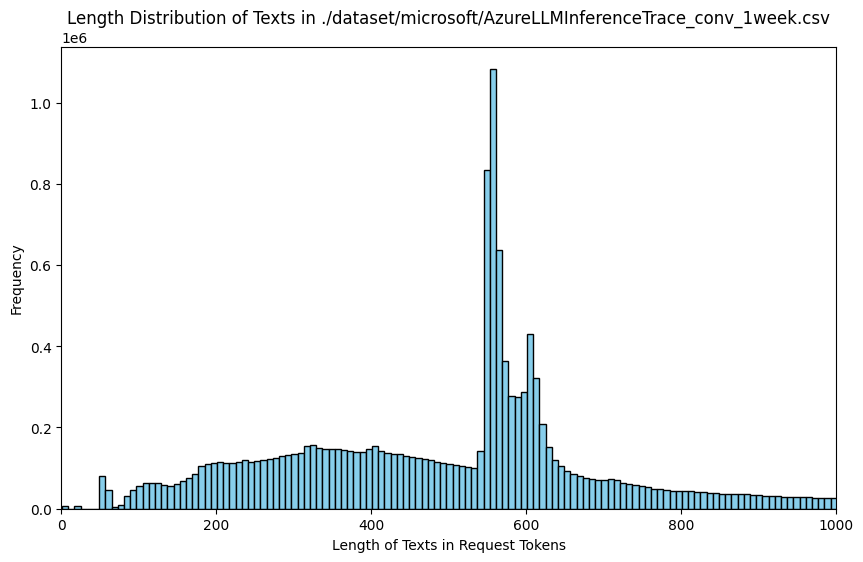

In [42]:
input_length = df["ContextTokens"]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(input_length, bins=1000, color="skyblue", edgecolor="black")
plt.title(f"Length Distribution of Texts in {dataset_path}")
plt.xlabel("Length of Texts in Request Tokens")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.savefig(f"assets/{figname}_narrow.png")

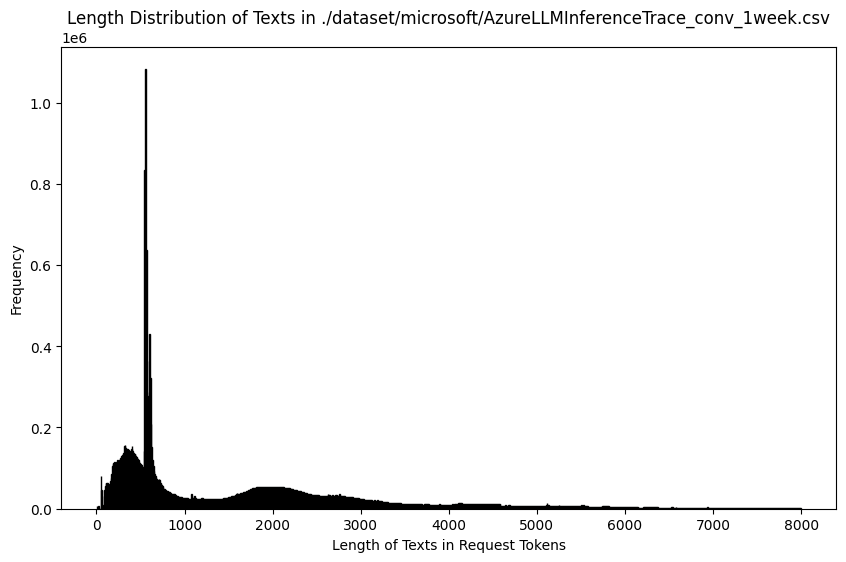

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(input_length, bins=1000, color="skyblue", edgecolor="black")
plt.title(f"Length Distribution of Texts in {dataset_path}")
plt.xlabel("Length of Texts in Request Tokens")
plt.ylabel("Frequency")
plt.savefig(f"assets/{figname}_big.png")